## Import Data

Download the data from this [repository](https://github.com/syamkakarla98/Satellite_Imagery_Analysis/tree/main/Data/sundarbans_raw_data) and place it to your directory to read it.

In [1]:
!ls /content/drive/MyDrive/Satellite_data/sundarbans_data_11

'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff'
'2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).tiff'
 2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color.tiff
 2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Scene_classification_map.tiff
 2020-01-27-00_00_2020-01-27-23_59_Sent

## Convert a satellite bands from `.tiff` to `.mat` format

In [2]:
!pip install rasterio earthpy

     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 37.0 MB/s 
     |████████████████████████████████| 1.0 MB 43.2 MB/s 
     |████████████████████████████████| 16.7 MB 1.4 MB/s 
     |████████████████████████████████| 6.3 MB 38.3 MB/s 


In [7]:
from glob import glob
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import rasterio as rio

### Convert a single `.tiff` file into `.mat` format

In [13]:

path = '/content/drive/MyDrive/Satellite_data/sundarbans_data_11/'

filename = f"{path}2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Scene_classification_map.tiff"

with rio.open(filename, 'r') as f:
    data = f.read(1)


print(f"Size: {data.shape}")

savemat(file_name='classification_map.mat', mdict={"classification_map": data })

Size: (954, 298)


In [5]:

path = '/content/drive/MyDrive/Satellite_data/sundarbans_data_11/'

sentinel_bands = glob(f"{path}*B?*.tiff")
sentinel_bands.sort()

l = []
for i in sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

# Data
arr_st = np.stack(l)
arr_st = np.moveaxis(arr_st, 0, -1)

print(arr_st.shape)

savemat(file_name='sundarbans_bands.mat', mdict={"data": arr_st })

(954, 298, 12)


In [11]:
!ls

classification_map.mat	drive  sample_data  sundarbans_bands.mat


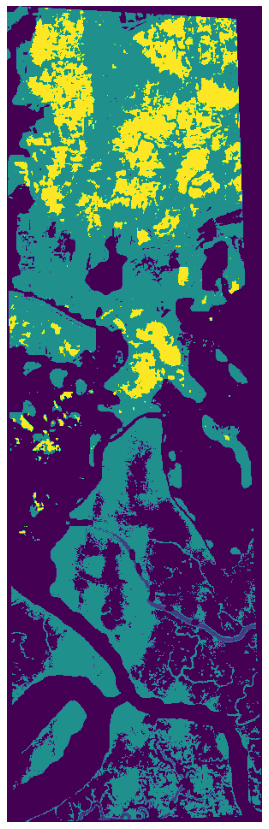

In [12]:
import matplotlib.pyplot as plt

with rio.open(f'{path}2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_Scene_classification_map.tiff', 'r') as f:
  gt = f.read(1)

plt.figure(figsize = (20,15))
plt.imshow(gt)
plt.axis('off')
plt.show()
